In [82]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from zipfile import ZipFile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [3]:
file_name = "archive.zip"

In [31]:
df13 = pd.read_csv('cfb13.csv')
df13.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,Akron (MAC),12,5,7,106,837,4104,4.90,30,31,...,29:20,74,6,13,19,11,10,21,-2,-0.17
1,Alabama (SEC),13,11,2,33,826,5903,7.15,58,65,...,32:00,48,8,11,19,10,7,17,2,0.15
2,Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57,...,28:30,39,4,18,22,11,7,18,4,0.31
3,Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69,...,30:21,7,12,21,33,6,12,18,15,1.07
4,Arkansas (SEC),12,3,9,99,775,4286,5.53,29,30,...,30:26,111,6,8,14,12,11,23,-9,-0.75


In [46]:
df13['Year'] = 2013
df13.head(1)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),12,5,7,106,837,4104,4.9,30,31,...,74,6,13,19,11,10,21,-2,-0.17,2013


In [18]:
df13.isna().sum().max()

0

In [35]:
len(df13.index)

111

In [19]:
print(df13.columns)

Index(['Team', 'Games', 'Win', 'Loss', 'Off.Rank', 'Off.Plays', 'Off.Yards',
       'Off.Yards.Play', 'Off.TDs', 'Total.TDs',
       ...
       'Average.Time.of.Possession.per.Game', 'Turnover.Rank',
       'Fumbles.Recovered', 'Opponents.Intercepted', 'Turnovers.Gain',
       'Fumbles.Lost', 'Interceptions.Thrown.y', 'Turnovers.Lost',
       'Turnover.Margin', 'Avg.Turnover.Margin.per.Game'],
      dtype='object', length=146)


In [45]:
print(list(df13.columns))

['Team', 'Games', 'Win', 'Loss', 'Off.Rank', 'Off.Plays', 'Off.Yards', 'Off.Yards.Play', 'Off.TDs', 'Total.TDs', 'Off.Yards.per.Game', 'Def.Rank', 'Def.Plays', 'Yards.Allowed', 'Yards.Play.Allowed', 'Off.TDs.Allowed', 'Total.TDs.Allowed', 'Yards.Per.Game.Allowed', 'First.Down.Rank', 'First.Down.Runs', 'First.Down.Passes', 'First.Down.Penalties', 'First.Downs', 'First.Down.Def.Rank', 'Opp.First.Down.Runs', 'Opp.First.Down.Passes', 'Opp.First.Down.Penalties', 'Opp.First.Downs', 'X4th.Down.Rank', 'X4th.Attempts', 'X4th.Conversions', 'X4th.Percent', 'X4rd.Down.Def.Rank', 'Opp.4th.Conversion', 'Opp.4th.Attempt', 'Opponent.4th.Percent', 'Kickoff.Return.Rank', 'Kickoffs.Returned', 'Kickoff.Return.Yards', 'Kickoff.Return.Touchdowns', 'Avg.Yard.per.Kickoff.Return', 'Passing.Off.Rank', 'Pass.Attempts', 'Pass.Completions', 'Interceptions.Thrown.x', 'Pass.Yards', 'Pass.Yards.Attempt', 'Yards.Completion', 'Pass.Touchdowns', 'Pass.Yards.Per.Game', 'Pass.Def.Rank', 'Opp.Completions.Allowed', 'Opp.Pas

In [47]:
df14 = pd.read_csv('cfb14.csv')
df14['Year'] = 2014
df14.head(2)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),12,5,7,88,891,4479,5.03,32,33,...,76,11,13,24,12,14,26,-2,-0.17,2014
1,Alabama (SEC),14,12,2,17,1018,6783,6.66,67,68,...,71,9,11,20,12,10,22,-2,-0.14,2014


In [36]:
len(df14.index)

113

In [48]:
df15 = pd.read_csv('cfb15.csv')
df15['Year'] = 2015
df15.head(2)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),13,8,5,104,905,4642,5.13,38,37,...,13,14,14,28,6,12,18,10,0.77,2015
1,Alabama (SEC),15,14,1,45,1088,6406,5.89,55,26,...,21,8,19,27,7,10,17,10,0.67,2015


In [37]:
len(df15.index)

115

In [49]:
df16 = pd.read_csv('cfb16.csv')
df16['Year'] = 2016
df16.head(2)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,114,6,8,14,8,14,22,-8,-0.67,2016
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,17,13,16,29,10,9,19,10,0.67,2016


In [38]:
len(df16.index)

116

In [50]:
df17 = pd.read_csv('cfb17.csv')
df17['Year'] = 2017
df17.head(2)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Air Force (MWC),12,5,7,49,908,5010,5.52,48,417.5,...,119,5,5,10,14,6,20,-10,-0.83,2017
1,Akron (MAC),14,7,7,121,906,4424,4.88,38,316.0,...,19,8,19,27,6,11,17,10,0.71,2017


In [39]:
len(df17.index)

129

In [51]:
df18 = pd.read_csv('cfb18.csv')
df18['Year'] = 2018
df18.head(2)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Air Force (MWC),12,5,7,52,882,4978,5.64,43,414.8,...,77,7,7,14,10,5,15,-1,-0.08,2018
1,Akron (MAC),12,4,8,126,764,3533,4.62,21,294.4,...,103,11,10,21,12,14,26,-5,-0.42,2018


In [40]:
len(df18.index)

129

In [52]:
df19 = pd.read_csv('cfb19.csv')
df19['Year'] = 2019
df19.head(2)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Air Force (Mountain West),13,11,2,51,881,5483,6.22,55,421.8,...,78,9,7,16,12,6,18,-2,-0.15,2019
1,Akron (MAC),12,0,12,130,725,2918,4.02,14,243.2,...,128,6,5,11,12,14,26,-15,-1.25,2019


In [41]:
len(df19.index)

130

In [53]:
df20 = pd.read_csv('cfb20.csv')
df20['Year'] = 2020
df20.head(2)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Air Force (Mountain West),6,3,3,73,373,2336,6.26,19,389.3,...,58,3,5,8,5,3,8,0,0.0,2020
1,Akron (MAC),6,1,5,121,360,1687,4.69,12,281.2,...,98,4,2,6,3,6,9,-3,-0.5,2020


In [54]:
len(df20.index)

127

we have to be careful with 2020 data as teams played less games during the covid year

In [55]:
dfreal = pd.concat([df13, df14, df15, df16, df17, df18, df19, df20], ignore_index=True, sort=False)
dfreal

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,...40,Kickoff.Return.Def.Rank,Opp.Kickoff.Returns,Kickoff.Touchbacks,Opponent.Kickoff.Return.Yards,Opp.Kickoff.Return.Touchdowns.Allowed,Avg.Yards.per.Kickoff.Return.Allowed
0,Akron (MAC),12,5,7,106,837,4104,4.90,30,31.0,...,-2,-0.17,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama (SEC),13,11,2,33,826,5903,7.15,58,65.0,...,2,0.15,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57.0,...,4,0.31,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69.0,...,15,1.07,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas (SEC),12,3,9,99,775,4286,5.53,29,30.0,...,-9,-0.75,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,NaN,...,3,0.33,2020,19.06,41.0,34.0,7.0,648.0,1.0,19.06
966,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,NaN,...,-3,-0.27,2020,21.10,66.0,21.0,18.0,443.0,1.0,21.10
967,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,NaN,...,-3,-0.50,2020,19.95,49.0,22.0,15.0,439.0,0.0,19.95
968,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,NaN,...,-3,-0.50,2020,21.08,63.0,13.0,11.0,274.0,0.0,21.08


In [63]:
print(list(dfreal.isna().sum()>0))

[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [65]:
print(dfreal.columns)

Index(['Team', 'Games', 'Win', 'Loss', 'Off.Rank', 'Off.Plays', 'Off.Yards',
       'Off.Yards.Play', 'Off.TDs', 'Total.TDs',
       ...
       'Turnover.Margin', 'Avg.Turnover.Margin.per.Game', 'Year', '...40',
       'Kickoff.Return.Def.Rank', 'Opp.Kickoff.Returns', 'Kickoff.Touchbacks',
       'Opponent.Kickoff.Return.Yards',
       'Opp.Kickoff.Return.Touchdowns.Allowed',
       'Avg.Yards.per.Kickoff.Return.Allowed'],
      dtype='object', length=154)


we have decided to drop the last 7 columns '...40',
       'Kickoff.Return.Def.Rank', 'Opp.Kickoff.Returns', 'Kickoff.Touchbacks',
       'Opponent.Kickoff.Return.Yards',
       'Opp.Kickoff.Return.Touchdowns.Allowed',
       'Avg.Yards.per.Kickoff.Return.Allowed'
as these all had null values throughout our dataset, and we are not wanting to focus on kickoffs in our analysis

In [66]:
dfreal.drop(['...40',
       'Kickoff.Return.Def.Rank', 'Opp.Kickoff.Returns', 'Kickoff.Touchbacks',
       'Opponent.Kickoff.Return.Yards',
       'Opp.Kickoff.Return.Touchdowns.Allowed',
       'Avg.Yards.per.Kickoff.Return.Allowed'], axis=1, inplace=True)

In [67]:
dfreal.head(1)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),12,5,7,106,837,4104,4.9,30,31.0,...,74,6,13,19,11,10,21,-2,-0.17,2013


In [68]:
print(list(dfreal.isna().sum()>0))

[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [83]:
print(list(dfreal.columns))

['Team', 'Games', 'Win', 'Loss', 'Off.Rank', 'Off.Plays', 'Off.Yards', 'Off.Yards.Play', 'Off.TDs', 'Total.TDs', 'Off.Yards.per.Game', 'Def.Rank', 'Def.Plays', 'Yards.Allowed', 'Yards.Play.Allowed', 'Off.TDs.Allowed', 'Total.TDs.Allowed', 'Yards.Per.Game.Allowed', 'First.Down.Rank', 'First.Down.Runs', 'First.Down.Passes', 'First.Down.Penalties', 'First.Downs', 'First.Down.Def.Rank', 'Opp.First.Down.Runs', 'Opp.First.Down.Passes', 'Opp.First.Down.Penalties', 'Opp.First.Downs', 'X4th.Down.Rank', 'X4th.Attempts', 'X4th.Conversions', 'X4th.Percent', 'X4rd.Down.Def.Rank', 'Opp.4th.Conversion', 'Opp.4th.Attempt', 'Opponent.4th.Percent', 'Kickoff.Return.Rank', 'Kickoffs.Returned', 'Kickoff.Return.Yards', 'Kickoff.Return.Touchdowns', 'Avg.Yard.per.Kickoff.Return', 'Passing.Off.Rank', 'Pass.Attempts', 'Pass.Completions', 'Interceptions.Thrown.x', 'Pass.Yards', 'Pass.Yards.Attempt', 'Yards.Completion', 'Pass.Touchdowns', 'Pass.Yards.Per.Game', 'Pass.Def.Rank', 'Opp.Completions.Allowed', 'Opp.Pas

we now have no columns with null values

In [71]:
pd.pivot_table(dfreal, values='Turnover.Rank', index=['Win'], columns=['Year'], aggfunc=np.mean)

Year,2013,2014,2015,2016,2017,2018,2019,2020
Win,,,,,,,,
0,79.000000,NaN,115.500000,NaN,103.000000,NaN,128.000000,108.444444
1,105.714286,119.666667,112.500000,NaN,123.200000,108.400000,73.666667,81.125000
2,93.625000,97.875000,109.000000,114.500000,97.375000,107.428571,115.833333,61.555556
3,81.875000,83.545455,84.933333,88.538462,100.500000,81.153846,104.625000,74.590909
4,83.000000,65.375000,84.625000,82.666667,83.692308,88.571429,79.111111,81.000000
5,77.500000,57.888889,74.636364,74.500000,74.785714,74.800000,58.214286,62.153846
6,82.000000,79.200000,62.500000,65.416667,61.000000,62.428571,58.600000,29.600000
7,53.153846,65.600000,58.800000,64.666667,64.208333,68.095238,65.428571,47.714286
8,50.333333,54.166667,44.333333,49.153846,52.230769,56.705882,62.173913,51.333333


This shows that ranking higher in turnovers (having a better turnover margin, more takeaways than giveaways), is very important to winning. You can see that as the number of wins goes up in every year, for the most part the turnover rank also goes up

In [77]:
dfreal.corr()

,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
Games,1.000000,0.572981,0.006188,-0.172457,0.903381,0.757213,0.194910,0.598112,0.429018,0.210847,...,-0.161701,0.403781,0.495695,0.583035,0.340910,0.271553,0.396909,0.177655,0.159837,-0.454284
Win,0.572981,1.000000,-0.816007,-0.551086,0.566026,0.740957,0.617060,0.787186,0.444665,0.572521,...,-0.558189,0.271989,0.582645,0.577831,0.016267,-0.203538,-0.140187,0.578778,0.562373,-0.150414
Loss,0.006188,-0.816007,1.000000,0.550762,-0.053471,-0.370003,-0.615424,-0.538621,-0.424070,-0.549840,...,0.567016,-0.047075,-0.361290,-0.293815,0.220596,0.439869,0.450986,-0.580885,-0.573436,-0.136881
Off.Rank,-0.172457,-0.551086,0.550762,1.000000,-0.398265,-0.742835,-0.855544,-0.777667,-0.629812,-0.960775,...,0.240072,-0.023068,-0.241897,-0.192237,0.012139,0.151870,0.118651,-0.246905,-0.250965,0.012947
Off.Plays,0.903381,0.566026,-0.053471,-0.398265,1.000000,0.851929,0.244245,0.673372,0.523829,0.441210,...,-0.154076,0.384898,0.505599,0.580390,0.328048,0.300762,0.410933,0.164905,0.150296,-0.466405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interceptions.Thrown.y,0.271553,-0.203538,0.439869,0.151870,0.300762,0.069149,-0.270854,-0.108579,-0.170638,-0.140657,...,0.512282,0.170334,0.019129,0.104584,0.146640,1.000000,0.819880,-0.533215,-0.528556,-0.314774
Turnovers.Lost,0.396909,-0.140187,0.450986,0.118651,0.410933,0.174105,-0.225667,-0.019726,-0.136916,-0.101031,...,0.571352,0.201259,0.117199,0.193964,0.686574,0.819880,1.000000,-0.596004,-0.589269,-0.398119
Turnover.Margin,0.177655,0.578778,-0.580885,-0.246905,0.164905,0.283030,0.305658,0.408653,0.286672,0.257503,...,-0.964762,0.409517,0.611334,0.672128,-0.352611,-0.533215,-0.596004,1.000000,0.981580,-0.017482
Avg.Turnover.Margin.per.Game,0.159837,0.562373,-0.573436,-0.250965,0.150296,0.268445,0.310874,0.393397,0.280544,0.262349,...,-0.968970,0.399623,0.596490,0.655834,-0.346890,-0.528556,-0.589269,0.981580,1.000000,-0.009825


In [81]:
dfreal.corr()['Win'].abs().nlargest(n=51)

Win                             1.000000
Total.Points                    0.829175
Loss                            0.816007
PAT                             0.815484
Touchdowns                      0.806012
Redzone.Scores                  0.790856
Off.TDs                         0.787186
Redzone.Attempts                0.768215
Off.Yards                       0.740957
Points.Per.Game                 0.713409
Scoring.Off.Rank                0.705054
Avg.Points.per.Game.Allowed     0.698439
Rushing.TD                      0.688141
Scoring.Def.Rank                0.684632
Redzone.Rush.TD                 0.670896
Tackle.for.Loss.Yards           0.643492
X3rd.Conversions                0.617549
Off.Yards.Play                  0.617060
Rush.Yds                        0.604091
Yards.Play.Allowed              0.601105
Total.Tackle.For.Loss           0.594770
Rushing.Def.Rank                0.587629
Rush.Yards.Per.Game.Allowed     0.584630
Opponents.Intercepted           0.582645
Opp.Pass.Attempt

Out of our 147 columns in our dataset, here are our 50 highest coorelated with winning more games. The top 2 correlations, 'total.points' and 'loss' make sense that they are so highly coorelated as scoring more points and losing less games leads to a lot more wins. We want to find out what other less known statistics play a large role. 

One thing that we noticed right away was that 'points.per.game' is slightly more coorelated to winning than  'avg.points.per.game.allowed'. This means that scoring more offensive points may be a bit more important than giving up less points on defense. 

In [90]:
dfreal.select_dtypes(include=[object])

,Team,Time.of.Possession,Average.Time.of.Possession.per.Game
0,Akron (MAC),352:08,29:20
1,Alabama (SEC),416:04,32:00
2,Arizona (Pac-12),370:31,28:30
3,Arizona St. (Pac-12),424:56,30:21
4,Arkansas (SEC),365:17,30:26
...,...,...,...
965,West Virginia (Big 12),293:40,32:38
966,Western Ky. (C-USA),323:17,29:23
967,Western Mich. (MAC),169:31,28:15
968,Wisconsin (Big Ten),220:31,36:45


In [99]:
dfreal['Time.of.Possession']=dfreal["Time.of.Possession"].str[:-3]

In [101]:
dfreal['Average.Time.of.Possession.per.Game']=dfreal["Average.Time.of.Possession.per.Game"].str[:-3]

we have decided to make time of possession and average time of possession integers so that they would be easier to work with in our data.

In [137]:
cols1=[ 'Games', 'Loss', 'Off.Rank', 'Off.Plays', 'Off.Yards', 'Off.Yards.Play', 'Off.TDs', 'Total.TDs', 'Off.Yards.per.Game', 'Def.Rank', 'Def.Plays', 'Yards.Allowed', 'Yards.Play.Allowed', 'Off.TDs.Allowed', 'Total.TDs.Allowed', 'Yards.Per.Game.Allowed', 'First.Down.Rank', 'First.Down.Runs', 'First.Down.Passes', 'First.Down.Penalties', 'First.Downs', 'First.Down.Def.Rank', 'Opp.First.Down.Runs', 'Opp.First.Down.Passes', 'Opp.First.Down.Penalties', 'Opp.First.Downs', 'X4th.Down.Rank', 'X4th.Attempts', 'X4th.Conversions', 'X4th.Percent', 'X4rd.Down.Def.Rank', 'Opp.4th.Conversion', 'Opp.4th.Attempt', 'Opponent.4th.Percent', 'Kickoff.Return.Rank', 'Kickoffs.Returned', 'Kickoff.Return.Yards', 'Kickoff.Return.Touchdowns', 'Avg.Yard.per.Kickoff.Return', 'Passing.Off.Rank', 'Pass.Attempts', 'Pass.Completions', 'Interceptions.Thrown.x', 'Pass.Yards', 'Pass.Yards.Attempt', 'Yards.Completion', 'Pass.Touchdowns', 'Pass.Yards.Per.Game', 'Pass.Def.Rank', 'Opp.Completions.Allowed', 'Opp.Pass.Attempts', 'Opp.Pass.Yds.Allowed', 'Opp.Pass.TDs.Allowed', 'Yards.Attempt.Allowed', 'Yards.Completion.Allowed', 'Pass.Yards.Per.Game.Allowed', 'Penalty.Rank', 'Penalties', 'Penalty.Yards', 'Penalty.Yards.Per.Game', 'Punt.Return.Rank', 'Punt.Returns', 'Net.Punt.Return.Yards', 'Punt.Return.Touchdowns', 'Avg.Yards.Per.Punt.Return', 'Punt.Return.Def.Rank', 'Opp.Punt.Returns', 'Opp.Net.Punt.Return.Yards', 'Opp.Punt.Return.Touchdowns.Allowed', 'Avg.Yards.Allowed.per.Punt.Return', 'Redzone.Off.Rank', 'Redzone.Attempts', 'Redzone.Rush.TD', 'Redzone.Pass.TD', 'Redzone.Field.Goals.Made', 'Redzone.Scores', 'Redzone.Points', 'Redzone.Def.Rank', 'Opp.Redzone.Attempts', 'Opp.Redzone.Rush.TD.Allowed', 'Opp.Redzone.Pass.Touchdowns.Allowed', 'Opp.Redzone.Field.Goals.Made', 'Opp.Redzone.Scores', 'Redzone.Points.Allowed', 'Rushing.Off.Rank', 'Rush.Attempts', 'Rush.Yds', 'Yards.Rush', 'Rushing.TD', 'Rushing.Yards.per.Game', 'Rushing.Def.Rank', 'Opp.Rush.Attempts', 'Opp.Rush.Yards.Alloweed', 'Yds.Rush.Allowed', 'Opp.Rush.Touchdowns.Allowed', 'Rush.Yards.Per.Game.Allowed', 'Sack.Rank', 'Sacks', 'Sack.Yards', 'Average.Sacks.per.Game', 'Scoring.Def.Rank', 'Touchdowns.Allowed', 'Opponent.Extra.Points', 'X2.Point.Conversions.Allowed', 'Opp.Deflected.Extra.Points', 'Opp.Feild.Goals.Made', 'Opp.Safety', 'Points.Allowed', 'Avg.Points.per.Game.Allowed', 'Scoring.Off.Rank', 'Touchdowns', 'PAT', 'X2.Point.Conversions', 'Defensive.Points', 'Feild.Goals', 'Safety', 'Total.Points', 'Points.Per.Game', 'Tackle.for.Loss.Rank', 'Solo.Tackle.For.Loss', 'Assist.Tackle.For.Loss', 'Tackle.for.Loss.Yards', 'Total.Tackle.For.Loss', 'Tackle.For.Loss.Per.Game', 'X3rd.Down.Rank', 'X3rd.Attempts', 'X3rd.Conversions', 'X3rd.Percent', 'X3rd.Down.Def.Rank', 'Opp.3rd.Conversion', 'Opp.3rd.Attempt', 'Opponent.3rd.Percent', 'Time.of.Possession.Rank', 'Time.of.Possession', 'Average.Time.of.Possession.per.Game', 'Turnover.Rank', 'Fumbles.Recovered', 'Opponents.Intercepted', 'Turnovers.Gain', 'Fumbles.Lost', 'Interceptions.Thrown.y', 'Turnovers.Lost', 'Turnover.Margin', 'Avg.Turnover.Margin.per.Game', 'Year']
x1= dfreal[cols1]

In [139]:
y = dfreal['Win']   
bestfeatures = SelectKBest(score_func=f_regression,k=50)
fit = bestfeatures.fit(x1,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(50,'Score'))  

                         Features        Score
116                  Total.Points  2129.906600
1                            Loss  1929.058791
111                           PAT  1921.676091
110                    Touchdowns  1794.996803
75                 Redzone.Scores  1616.460320
6                         Off.TDs  1577.102676
71               Redzone.Attempts  1393.867719
4                       Off.Yards  1178.424277
117               Points.Per.Game  1003.298260
109              Scoring.Off.Rank   956.842312
108   Avg.Points.per.Game.Allowed   921.950392
88                     Rushing.TD   870.687202
100              Scoring.Def.Rank   854.019324
72                Redzone.Rush.TD   792.324122
121         Tackle.for.Loss.Yards   684.108154
126              X3rd.Conversions   596.739975
5                  Off.Yards.Play   595.214638
133            Time.of.Possession   585.799097
86                       Rush.Yds   556.231467
12             Yards.Play.Allowed   547.642949
122         T

Here are our top 50 columns from this selectKbest function. They appear to be pretty similar to what we had earlier with just the plain correlation function 

Again total points and loss are the two highest in terms of this score. We are going to disregard loss as one of our columns as it is obvious to casual fans that if you don't lose you have a much higher chance of winning.

In [142]:
scoringcolumns=[ 'Off.TDs', 'Total.TDs', 'Off.TDs.Allowed', 'Total.TDs.Allowed', 'Scoring.Def.Rank',  'Points.Allowed', 'Avg.Points.per.Game.Allowed', 'Scoring.Off.Rank', 'Defensive.Points', 'Total.Points', 'Points.Per.Game']
dfscoring= dfreal[scoringcolumns]

we have decided to just look at total scoring in general to figure out what type of offensive scoring or defensive scoring allowed is most important to winning.

In [147]:
y = dfreal['Win']   
bestfeatures = SelectKBest(score_func=f_regression,k=11)
fit = bestfeatures.fit(dfscoring,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dfscoring.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(11,'Score'))  

                       Features        Score
9                  Total.Points  2129.906600
0                       Off.TDs  1577.102676
10              Points.Per.Game  1003.298260
7              Scoring.Off.Rank   956.842312
6   Avg.Points.per.Game.Allowed   921.950392
4              Scoring.Def.Rank   854.019324
3             Total.TDs.Allowed   157.192588
2               Off.TDs.Allowed   135.537484
5                Points.Allowed   135.118505
1                     Total.TDs    73.360577
8              Defensive.Points     2.204182


As you can see from this score. Offensive point rankings, are scored much more highly than defensive scoring rankings when correlating to wins. 

In [164]:
scoringcolumnsnew=[ 'Total.Points', 'Points.Allowed', 'Avg.Points.per.Game.Allowed', 'Points.Per.Game']
dfscoringnew= dfreal[scoringcolumnsnew]

We have decided to simplify the columns we use in our below model even more, that way we do not have as much multicollinearity going on. We chose these four columns as they showcase the same statistics for both offense and defense 

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
xtrainscoring, xtestscoring, ytrainscoring, ytestscoring = train_test_split(dfscoringnew, y, test_size=0.2, random_state = 6)

In [167]:
xtrainscoringmodel=sm.add_constant(xtrainscoring)
multipleregscoring=sm.OLS(ytrainscoring,xtrainscoringmodel).fit()
multipleregscoring.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1513.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:26:04   Log-Likelihood:                -1159.1
No. Observations:                 776   AIC:                             2328.
Df Residuals:                     771   BIC:                             2352.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.0493      0.260     23.276      0.000       5.539       6.559
Total.Points                    0.0256      0.002     17.057      0.000       0.023       0.029
Points.Allowed                 -0.0062      0.002     -3.901      0.000      -0.009      -0.003
Avg.Points.per.Game.Allowed    -0.1414      0.020     -7.248      0.000      -0.180      -0.103
Points.Per.Game                -0.0952      0.019     -5.013      0.000      -0.132      -0.058
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.301
Skew:                          -0.020   Prob(JB):                        0.860
Kurtosis:                       2.912   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
ypredscoring =multipleregscoring.predict(sm.add_constant(xtestscoring))

In [169]:
from sklearn.metrics import r2_score
r2_score(ytestscoring, ypredscoring)

0.877065830278236

In [170]:
ypredtrainscoring =multipleregscoring.predict(sm.add_constant(xtrainscoring))

In [171]:
r2_score(ytrainscoring, ypredtrainscoring)

0.8870049674430671

these two R Squares are very close, showing that this model is doind a pretty good job of predicting on the test data. From the above model, we can see that the total.points (an offensive statistics) has the highest t score of our variables which indicates that it is most important in predicting wins in our model. This goes along with what we were seeing on our selectkbest function earlier with offensive scoring being more important to winning than defensive points given up. From this we can infer that it may be more important for college football teams to have a good offense that can score rather than a good defense that prevents other teams from scoring. 

One interesting thing we have noticed is that rushing stats seem to be higher correlated and higher on the selectkbest score function above than passing stats are, both offensive and defensive wise. We want to specifcially look into rushing yards vs passing yards for both offense and defense to look more into which seems to be more important in a model now.  

In [179]:
runvspasscolumns= ['Passing.Off.Rank', 'Pass.Def.Rank', 'Rushing.Off.Rank', 'Rushing.Def.Rank' ]
dfrunvspass= dfreal[runvspasscolumns]

In [182]:
xtrainrunvspass, xtestrunvspass, ytrainrunvspass, ytestrunvspass = train_test_split(dfrunvspass, y, test_size=0.2, random_state = 6)

In [184]:
xtrainrunvspassmodel=sm.add_constant(xtrainrunvspass)
multipleregrunvspass=sm.OLS(ytrainrunvspass,xtrainrunvspassmodel).fit()
multipleregrunvspass.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     320.1
Date:                Mon, 29 Nov 2021   Prob (F-statistic):          3.53e-162
Time:                        10:40:53   Log-Likelihood:                -1625.4
No. Observations:                 776   AIC:                             3261.
Df Residuals:                     771   BIC:                             3284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.0910      0.276     54.699      0.000      14.549      15.633
Passing.Off.Rank    -0.0377      0.002    -18.188      0.000      -0.042      -0.034
Pass.Def.Rank       -0.0196      0.002     -9.704      0.000      -0.024      -0.016
Rushing.Off.Rank    -0.0363      0.002    -17.823      0.000      -0.040      -0.032
Rushing.Def.Rank    -0.0413      0.002    -20.627      0.000      -0.045      -0.037
==============================================================================
Omnibus:                        6.086   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.967
Skew:                          -0.192   Prob(JB):                       0.0506
Kurtosis:                       3.191   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
ypredrunvspass =multipleregrunvspass.predict(sm.add_constant(xtestrunvspass))

In [187]:
r2_score(ytestrunvspass, ypredrunvspass)

0.5836977143594407

In [188]:
ypredtrainrunvspass =multipleregrunvspass.predict(sm.add_constant(xtrainrunvspass))

In [189]:
r2_score(ytrainrunvspass, ypredtrainrunvspass)

0.624158931043236

these R squared scores are pretty similar, but not super high overall in terms of predicting winning. This is not surprising as we are only using the passing and running ranks which only incorporates yards and not scoring. Overall, the rushing offensive and defensive rank seems to be more important to winning than the passing rank as the t scores are higher for the rushing stats overall. This agrees with what we saw earlier on our kbest score and also our correlation. Because of this we believe it is more important to overall have a team that is good at getting rushing yards and also defending rushing yards rather than a team that is very good offensively and defensively at passing in terms of yards.

One of the things we discussed in our proposal and what we would like to look at now is whether it is more important to prevent turnovers offensively, or create turnovers defensively in terms of getting more wins. 

In [190]:
turnovercolumns=[ 'Turnover.Rank', 'Fumbles.Recovered', 'Opponents.Intercepted', 'Turnovers.Gain', 'Fumbles.Lost', 'Interceptions.Thrown.y', 'Turnovers.Lost', 'Turnover.Margin', 'Avg.Turnover.Margin.per.Game']
dfturnovers= dfreal[turnovercolumns]

In [192]:
y = dfreal['Win']   
bestfeatures = SelectKBest(score_func=f_regression,k=9)
fit = bestfeatures.fit(dfturnovers,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dfturnovers.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(9,'Score'))  

                       Features       Score
2         Opponents.Intercepted  497.502318
7               Turnover.Margin  487.604990
3                Turnovers.Gain  485.210572
8  Avg.Turnover.Margin.per.Game  447.750539
0                 Turnover.Rank  438.108541
1             Fumbles.Recovered   77.331250
5        Interceptions.Thrown.y   41.835351
6                Turnovers.Lost   19.404755
4                  Fumbles.Lost    0.256219


From this you can see that it seems like turnovers gained (getting a turnover on defense) is more important to winning than turnovers lost giving up a turnovers lost (giving up a turnover on offense). We have decided to get rid of turnover.margin avg.turnover.margin.per.game and turnover.rank to prevent some multicollinearity and also look more into whether fumbles or interceptions are more important.

In [198]:
turnovercolumnsnew=[ 'Fumbles.Recovered', 'Opponents.Intercepted', 'Turnovers.Gain', 'Fumbles.Lost', 'Interceptions.Thrown.y', 'Turnovers.Lost']
dfturnoversnew= dfreal[turnovercolumnsnew]

In [199]:
xtrainturnovers, xtestturnovers, ytrainturnovers, ytestturnovers = train_test_split(dfturnoversnew, y, test_size=0.2, random_state = 6)

In [200]:
xtrainturnoversmodel=sm.add_constant(xtrainturnovers)
multipleregturnovers=sm.OLS(ytrainturnovers,xtrainturnoversmodel).fit()
multipleregturnovers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 29 Nov 2021   Prob (F-statistic):          1.92e-103
Time:                        10:56:18   Log-Likelihood:                -1761.8
No. Observations:                 776   AIC:                             3534.
Df Residuals:                     771   BIC:                             3557.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.7378      0.367      7.464      0.000       2.018       3.458
Fumbles.Recovered         -0.0080      0.020     -0.393      0.695      -0.048       0.032
Opponents.Intercepted      0.2103      0.017     12.305      0.000       0.177       0.244
Turnovers.Gain             0.2022      0.010     20.146      0.000       0.183       0.222
Fumbles.Lost               0.0222      0.020      1.125      0.261      -0.017       0.061
Interceptions.Thrown.y    -0.1030      0.017     -5.923      0.000      -0.137      -0.069
Turnovers.Lost            -0.0808      0.010     -7.889      0.000      -0.101      -0.061
==============================================================================
Omnibus:                        9.175   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.151
Skew:                           0.261   Prob(JB):                       0.0103
Kurtosis:                       3.103   Cond. No.                     4.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [201]:
ypredturnovers =multipleregturnovers.predict(sm.add_constant(xtestturnovers))

In [202]:
r2_score(ytestturnovers, ypredturnovers)

0.23854536719588137

This is concerning that the test R squared is much lower than the train r squared from our model. From our model it at least looks like turnovers gained are more important to winning than turnovers lost (higher t score). It also appears that interceptions thrown on offense and taken on defense are more important than fumbles gained or lost. 

While it is concerning that the test R Squared score is lower than the train R squared score, we still believe that there is some evidence that gaining turnovers (defensive) is more important than turnovers lost (offensive). We also believe that teams should focus more on throwing less interceptions and gaining more interceptions rather than focusing on fumbles, as interceptions seem to be more correlated to winning than fumbles do from what we have found in our model and selectkbest score. 

In [208]:
thirddowncolumns=['X3rd.Down.Rank', 'X3rd.Percent', 'X3rd.Down.Def.Rank', 'Opponent.3rd.Percent']
dfthirddownnew= dfreal[thirddowncolumns]

One other thing that we wanted to look more into is whether it is more important for a team to be good at third downs offensively or defensively. This is similar to when we look at offense vs defense as a whole, but we have decided to split it into just this third down data because as many fans know third downs can play a huge role in close games. We decided to focus it down to third down offense and defense rank and third down percent as we believe that these columns show which teams are better at converting when they actually get themselves into third down situations.

In [226]:
  bestfeatures = SelectKBest(score_func=f_regression,k=4)
fit = bestfeatures.fit(dfthirddown,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dfthirddown.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(4,'Score'))  

               Features       Score
0        X3rd.Down.Rank  477.380012
1          X3rd.Percent  468.215085
3  Opponent.3rd.Percent  377.085949
2    X3rd.Down.Def.Rank  345.595684


In [209]:
xtrainthirddown, xtestthirddown, ytrainthirddown, ytestthirddown = train_test_split(dfthirddownnew, y, test_size=0.2, random_state = 6)

In [210]:
xtrainthirddownmodel=sm.add_constant(xtrainthirddown)
multipleregthirddown=sm.OLS(ytrainthirddown,xtrainthirddownmodel).fit()
multipleregthirddown.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     216.1
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          2.59e-124
Time:                        15:52:56   Log-Likelihood:                -1713.3
No. Observations:                 776   AIC:                             3437.
Df Residuals:                     771   BIC:                             3460.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5813      3.081      3.758      0.000       5.532      17.630
X3rd.Down.Rank          -0.0265      0.008     -3.184      0.002      -0.043      -0.010
X3rd.Percent            11.4587      5.227      2.192      0.029       1.198      21.719
X3rd.Down.Def.Rank      -0.0090      0.008     -1.081      0.280      -0.025       0.007
Opponent.3rd.Percent   -19.0562      5.525     -3.449      0.001     -29.903      -8.210
==============================================================================
Omnibus:                        2.852   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.846
Skew:                          -0.116   Prob(JB):                        0.241
Kurtosis:                       2.814   Cond. No.                     7.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
ypredthirddown =multipleregthirddown.predict(sm.add_constant(xtestthirddown))

In [225]:
r2_score(ytestthirddown, ypredthirddown)

0.533750032388997

Pretty good that test R Squared lines up with our train model R Squared. From this model you can see that the offensive third down statistics (X3rd.Down.Rank and X3rd.Percent) have slightly lower p values overall than the two defensive variables. This along with our selectkbestfunction above with the two highest scores being offensive also leads us to believe that being good offensively on third down may be slightly more important than being good defensively. This also aligns with what we saw earlier for overall offensive and defensive statistics. Coaches may want to focus a bit more on the offense converting a third down to give themselves a better chance to win.

In [227]:
from sklearn.cluster import KMeans

using dataframe with all columns created earlier to make clusters

In [299]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x1)
y_kmeans = kmeans.predict(x1)

In [300]:
list(y_kmeans)

[3,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 2,
 1,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 3,
 2,
 0,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 1,


In [301]:
centers = kmeans.cluster_centers_

In [302]:
y_kmeans

array([3, 1, 1, 2, 3, 1, 1, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 1, 3, 2, 2, 1, 2, 3, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 2,
       1, 3, 3, 2, 3, 3, 1, 1, 1, 1, 2, 1, 3, 1, 3, 2, 1, 2, 3, 1, 3, 2,
       1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1,
       2, 3, 2, 1, 2, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3,
       1, 3, 2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       3, 3, 3, 1, 2, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 2, 1,
       1, 2, 3, 3, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2,
       3, 2, 1, 3, 1, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       3, 3, 2, 1, 2, 2, 3, 3, 3, 1, 1, 2, 3, 1, 1, 3, 3, 1, 1, 3, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 0, 2, 3, 2, 2, 1, 2,
       2, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 3, 3, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 2, 1, 1, 1, 3, 3, 2, 3, 3, 1, 1, 2, 3, 2, 0, 1, 1, 2, 3,
       2, 3, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1,

In [303]:
dfreal['Clusters'] = y_kmeans.tolist()
dfreal.head(3)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,Clusters
0,Akron (MAC),12,5,7,106,837,4104,4.90,30,31.0,...,6,13,19,11,10,21,-2,-0.17,2013,3
1,Alabama (SEC),13,11,2,33,826,5903,7.15,58,65.0,...,8,11,19,10,7,17,2,0.15,2013,1
2,Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57.0,...,4,18,22,11,7,18,4,0.31,2013,1


In [304]:
dfreal['Clusters'].value_counts()

3    341
1    304
2    248
0     77
Name: Clusters, dtype: int64

In [305]:
dfcluster0=dfreal.loc[dfreal['Clusters'] == 0]
dfcluster0.head(1)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,Clusters
235,Boston College (ACC),12,3,9,125,751,3307,4.4,25,19.0,...,10,13,23,11,9,20,3,0.25,2015,0


In [306]:
dfcluster1=dfreal.loc[dfreal['Clusters'] == 1]
dfcluster1.head(1)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,Clusters
1,Alabama (SEC),13,11,2,33,826,5903,7.15,58,65.0,...,8,11,19,10,7,17,2,0.15,2013,1


In [307]:
dfcluster2=dfreal.loc[dfreal['Clusters'] == 2]
dfcluster2.head(1)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,Clusters
3,Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69.0,...,12,21,33,6,12,18,15,1.07,2013,2


In [308]:
dfcluster3=dfreal.loc[dfreal['Clusters'] == 3]
dfcluster3.head(1)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,Clusters
0,Akron (MAC),12,5,7,106,837,4104,4.9,30,31.0,...,6,13,19,11,10,21,-2,-0.17,2013,3


In [310]:
dfcluster0['Win'].mean()

3.4285714285714284

In [311]:
dfcluster1['Win'].mean()

8.233552631578947

In [312]:
dfcluster2['Win'].mean()

8.608870967741936

In [313]:
dfcluster3['Win'].mean()

3.9501466275659824

it looks like this created 2 clusters with lower # of wins and 2 with higher number of wins

In [326]:
dfcluster0['Redzone.Off.Rank'].mean()

65.94805194805195

In [327]:
dfcluster3['Redzone.Off.Rank'].mean()

77.91788856304986

In [328]:
dfcluster1['Redzone.Off.Rank'].mean()

57.1546052631579

In [329]:
dfcluster2['Redzone.Off.Rank'].mean()

52.34274193548387

Both of the cluster which a much higher average mean of wins (cluster 1 and 2), have lower ranks for Redzone Offense Rank (this is good, rank 1 would be the best). This indicates that it is probably important to be good in the redzone offensively to get wins.

In [331]:
dfcluster0['Redzone.Def.Rank'].mean()

62.96103896103896

In [332]:
dfcluster3['Redzone.Def.Rank'].mean()

69.23753665689149

In [333]:
dfcluster1['Redzone.Def.Rank'].mean()

55.16776315789474

In [330]:
dfcluster2['Redzone.Def.Rank'].mean()

64.72177419354838

These are a bit closer between the winning clusters (cluster 1 and 2) and the more often losing clusters (clusters 0 and 3). This could again be indicating that offense is more important than defense in winning

In [339]:
dfcluster0['Average.Sacks.per.Game'].mean()

2.2205194805194806

In [340]:
dfcluster3['Average.Sacks.per.Game'].mean()

2.4437243401759545

In [341]:
dfcluster1['Average.Sacks.per.Game'].mean()

1.7959539473684223

In [342]:
dfcluster2['Average.Sacks.per.Game'].mean()

1.9585080645161295

In [343]:
dfcluster0['Tackle.For.Loss.Per.Game'].mean()

6.054545454545454

In [344]:
dfcluster3['Tackle.For.Loss.Per.Game'].mean()

5.645454545454543

In [345]:
dfcluster1['Tackle.For.Loss.Per.Game'].mean()

6.296381578947365

In [346]:
dfcluster2['Tackle.For.Loss.Per.Game'].mean()

6.304838709677427

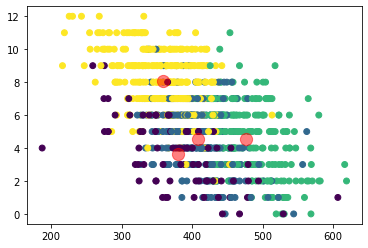

In [347]:
x1array=np.array(x1)
plt.scatter(x1array[:, 8], x1array[:, 1], c=y_kmeans, s=35, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 8], centers[:, 1], c='red', s=150, alpha=0.5);

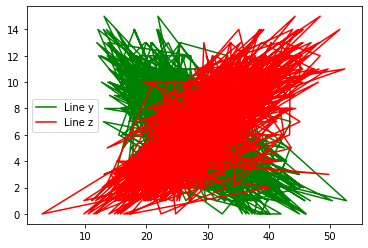

In [360]:
plt.plot(dfreal['Avg.Points.per.Game.Allowed'], dfreal['Win'], color='g', label='Line y')

# Plot another line on the same chart/graph
plt.plot(dfreal['Points.Per.Game'], dfreal['Win'], color='r', label='Line z')

plt.legend()
plt.show()

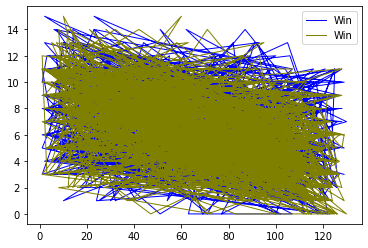

<Figure size 72x72 with 0 Axes>

In [382]:
# multiple line plots
plt.plot( 'Passing.Off.Rank', 'Win', data=dfreal, marker='', color='blue', linewidth=1)
plt.plot( 'Rushing.Off.Rank', 'Win', data=dfreal, marker='', color='olive', linewidth=1)

# show legend
plt.legend()

plt.figure(figsize=(1, 1))
# show graph
plt.show()

In [407]:
coorelation_columns=[ 'Win','Total.Points','Points.Allowed','Points.Per.Game',  'Avg.Points.per.Game.Allowed', 'Passing.Off.Rank', 'Pass.Def.Rank', 'Rushing.Off.Rank', 'Rushing.Def.Rank','Fumbles.Recovered', 'Fumbles.Lost','Opponents.Intercepted','Interceptions.Thrown.y', 'Turnovers.Gain', 'Turnovers.Lost']
dfcoorelation_columns= dfreal[coorelation_columns]

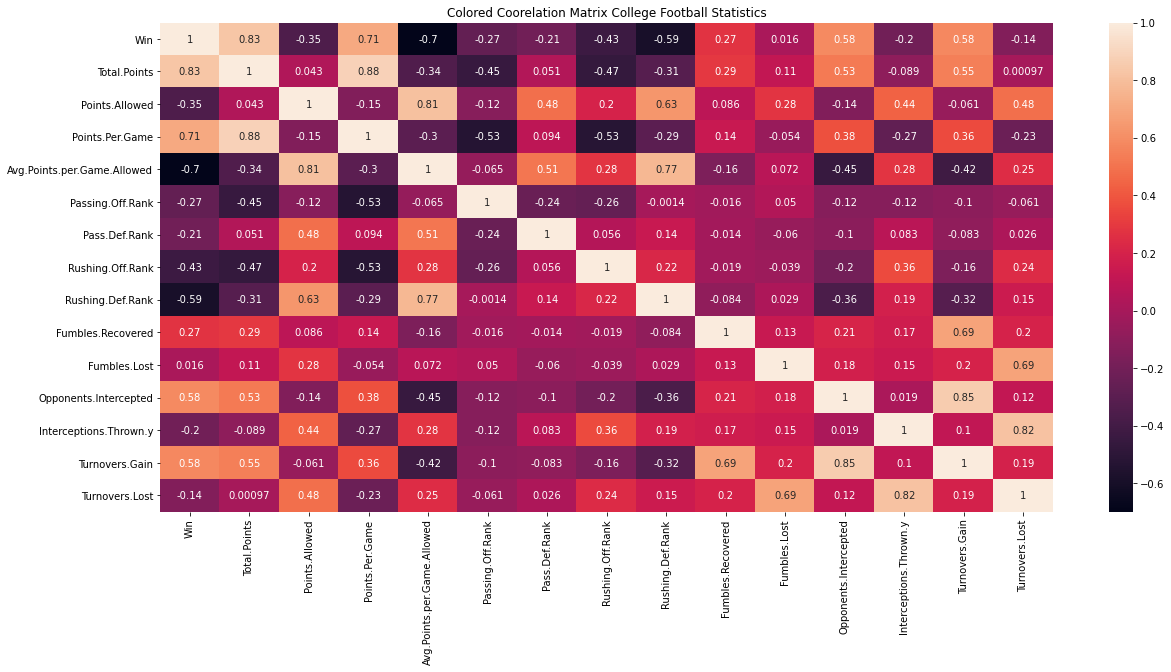

In [457]:
corrMatrix = dfcoorelation_columns.corr()
plt.figure(figsize = (20,9))
sns.heatmap(corrMatrix, annot=True)
plt.title('Colored Coorelation Matrix College Football Statistics')
plt.show()

Text(0.5, 1.0, 'Rushing Defense Rank')

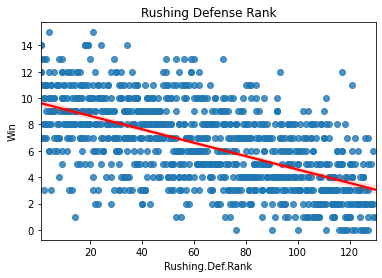

In [422]:
sns.regplot(x='Rushing.Def.Rank', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Rushing Defense Rank')

Text(0.5, 1.0, 'Passing Defense Rank')

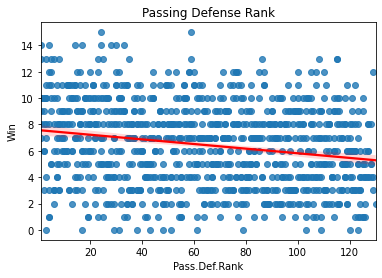

In [423]:
sns.regplot(x='Pass.Def.Rank', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Passing Defense Rank')

Text(0.5, 1.0, 'Rushing Offense Rank')

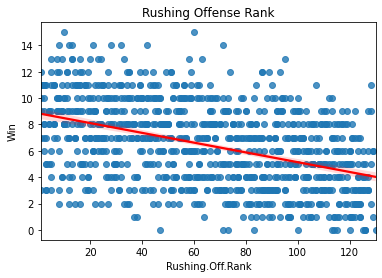

In [445]:
sns.regplot(x='Rushing.Off.Rank', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Rushing Offense Rank')

Text(0.5, 1.0, 'Passing Offense Rank')

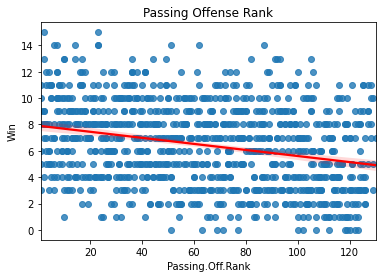

In [448]:
sns.regplot(x='Passing.Off.Rank', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Passing Offense Rank')

Text(0.5, 1.0, 'Turnovers Gained Defensivly')

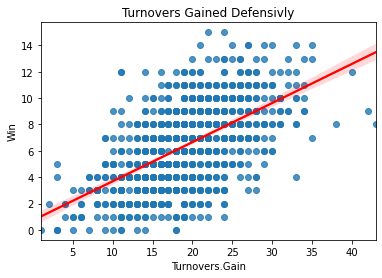

In [424]:
sns.regplot(x='Turnovers.Gain', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Turnovers Gained Defensively')

Text(0.5, 1.0, 'Turnovers Lost Offensivly')

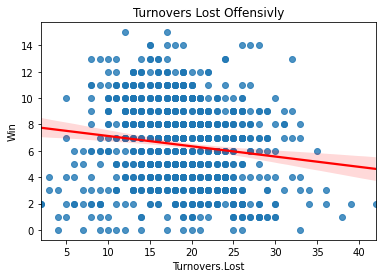

In [425]:
sns.regplot(x='Turnovers.Lost', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Turnovers Lost Offensively')

Text(0.5, 1.0, 'Opponent Interceptions')

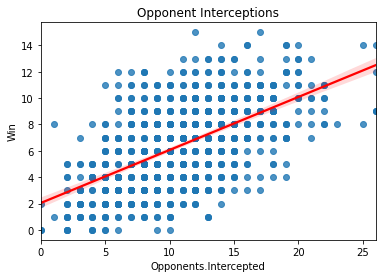

In [426]:
sns.regplot(x='Opponents.Intercepted', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Opponent Interceptions')

Text(0.5, 1.0, 'Fumbles Recovered')

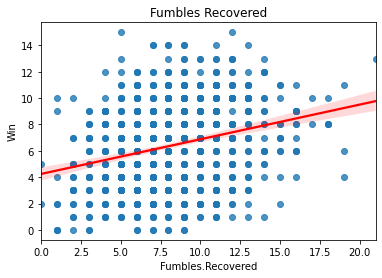

In [427]:
sns.regplot(x='Fumbles.Recovered', y='Win', data=dfreal,line_kws={"color": "red"}).set_title('Fumbles Recovered')

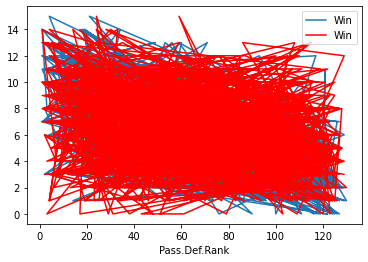

In [460]:
ax = plt.gca()
dfreal.plot(kind='line',x='Rushing.Def.Rank',y='Win',ax=ax)
dfreal.plot(kind='line',x='Pass.Def.Rank',y='Win', color='red',ax=ax)

plt.show()

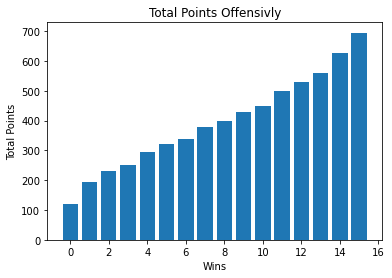

In [452]:
df_barplot=dfreal.groupby(['Win']).agg({'Total.Points':'mean'})
plt.bar(df_barplot.index,df_barplot['Total.Points'])
plt.title('Total Points Offensively')
plt.xlabel('Wins')
plt.ylabel('Total Points')
plt.show()

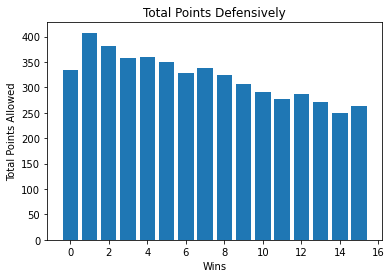

In [454]:
df_barplotdefense=dfreal.groupby(['Win']).agg({'Points.Allowed'	:'mean'})
plt.bar(df_barplotdefense.index,df_barplotdefense['Points.Allowed'])
plt.title('Total Points Defensively')
plt.xlabel('Wins')
plt.ylabel('Total Points Allowed')
plt.show()